In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp

# Toy Simulations

In [2]:
def solve_euler(dif_f, init, trange, step):
    sol = np.zeros((len(init), int((trange[1]-trange[0])//step) + (0 if (trange[1]-trange[0]) % step == 0 else 1)))
    sol[:,0] = init
    step_num = 0
    for k in np.arange(trange[0], trange[1]-step, step):
        sol[:, step_num+1] = sol[:, step_num] + step * dif_f(k, sol[:, step_num])
        step_num += 1
    return sol

def eval_solver(dif_f, sol, init, trange, t_step_range=[-7, 1.5], num_step_sizes=100):
    tsteps = []
    diffs = []
    for tstep in np.logspace(t_step_range[0], t_step_range[1], num_step_sizes):
        num_sol = solve_euler(dif_f, init, trange, tstep)
        print(f"done {tstep}")
        print(f"{num_sol.shape} {np.arange(trange[0], trange[1], tstep).shape}")
        acc_sol = np.array([sol(t) for t in np.arange(trange[0], trange[1], tstep)])
        avg_dif = np.average(np.abs(num_sol[0]-acc_sol)) 
        tsteps.append(tstep)
        diffs.append(avg_dif)
        
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Integration Time Step ∆t (s)")
    plt.ylabel("Average Error ∆x (m)")
    plt.plot(np.array(tsteps), np.array(diffs))

## Mass-Spring System

In [3]:
%%latex
Differential Equation: $$ \ddot{x}=-\frac{k}{m}x, x(0)=x_0 $$

Analytical Solution: $$ x(t)=x_0 \cos(\omega t) $$ where $\omega=\sqrt{\frac{k}{m}}$

<IPython.core.display.Latex object>

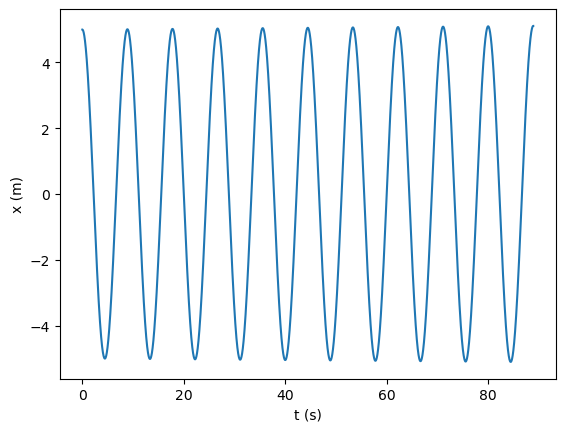

In [4]:
m = 10 # kg
k = 5 # kg/s^-2

def f(t, y):
    return np.array([y[1], -(k/m)*y[0]])

init = [5, 0]
def sol1(t):
    return 5*np.cos(np.sqrt(k/m)*t)

trange1 = [0, 10*2*np.pi*((m/k)**0.5)]
step1 = 0.001
sol = solve_euler(f, init, trange1, step1)

plt.plot(np.arange(trange1[0], trange1[1], step1), sol[0])
# plt.plot(trange1, sol1(trange1))
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()

done 0.001
(2, 88858) (88858,)
done 0.0011103363181676378
(2, 80028) (80028,)
done 0.0012328467394420659
(2, 72076) (72076,)
done 0.0013688745095370807
(2, 64913) (64913,)
done 0.0015199110829529332
(2, 58463) (58463,)
done 0.0016876124757881487
(2, 52653) (52653,)
done 0.001873817422860383
(2, 47421) (47421,)
done 0.0020805675382171715
(2, 42709) (42709,)
done 0.0023101297000831605
(2, 38465) (38465,)
done 0.0025650209056800456
(2, 34643) (34643,)
done 0.002848035868435802
(2, 31200) (31200,)
done 0.0031622776601683794
(2, 28100) (28100,)
done 0.003511191734215131
(2, 25307) (25307,)
done 0.003898603702549072
(2, 22793) (22793,)
done 0.004328761281083057
(2, 20528) (20528,)
done 0.004806380863064389
(2, 18488) (18488,)
done 0.005336699231206312
(2, 16651) (16651,)
done 0.005925530975545675
(2, 14996) (14996,)
done 0.006579332246575682
(2, 13506) (13506,)
done 0.007305271542664456
(2, 12164) (12164,)
done 0.008111308307896872
(2, 10955) (10955,)
done 0.009006280202112787
(2, 9867) (986

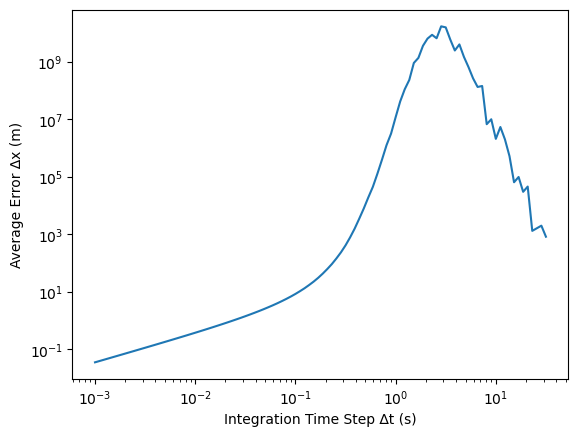

In [5]:
eval_solver(f, sol1, init, trange=trange1, t_step_range=[-3, 1.5])
plt.show()

## Two Coupled Masses System

In [383]:
%%latex
Differential Equations:
$$ \ddot{x_1} = -\frac{k_1}{m}x_1+\frac{k_2}{m}\left((x_2-x_1)-d\right), x_1(0)=x_{1,0} $$
$$ \ddot{x_2} = -\frac{k_2}{m}\left((x_2-x_1)-d\right)-\frac{k_1}{m}(x_2-d), x_2(0)=x_{2,0} $$
Analytic Solutions:
$$ x_1(t) = \frac{x_{1,0}+x_{2,0}}{2}\cos(\omega_1 t)+\frac{x_{1,0}-x_{2,0}}{2}\cos(\omega_2 t) $$
$$ x_2(t) = \frac{x_{1,0}+x_{2,0}}{2}\cos(\omega_1 t)-\frac{x_{1,0}-x_{2,0}}{2}\cos(\omega_2 t) $$
where $\omega_1=\sqrt{\frac{k_1}{m}}$ and $\omega_2=\sqrt{\frac{k_1+2k_2}{m}}$. If $x_2(0)=0$, we can write $x_1(t)$ as
$$ x_1(t)=x_{1,0}cos\left(\frac{\omega_1+\omega_2}{2}t\right)cos\left(\frac{\omega_1-\omega_2}{2}t\right)$$


<IPython.core.display.Latex object>

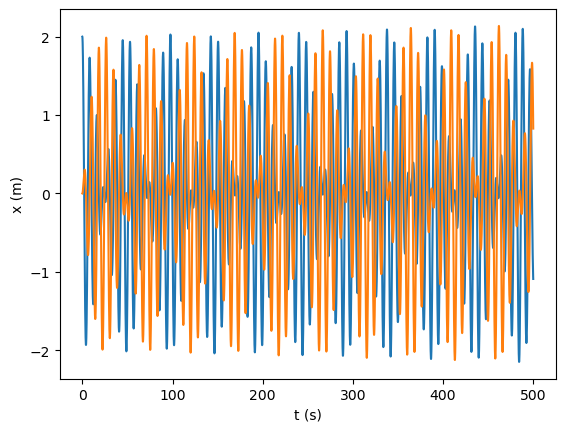

In [414]:
m = 10
k1 = 5
k2 = 1
d = 0 # doesn't affect much

omega1 = (k1/m) ** 0.5
omega2 = ((k1+2*k2)/m) ** 0.5

def f2(t, y):
    return np.array([
                        y[1],
                        -(k1/m)*y[0]-(k2/m)*(d-(y[2]-y[0])),
                        y[3],
                        (k2/m)*(d-(y[2]-y[0]))-(k1/m)*(y[2]-d)
                    ])

init2 = [2, 0, 0, 0]
def sol2(t):
    return ((init2[0]+init2[2])/2)*np.cos(omega1*t) + ((init2[0]-init2[2])/2)*np.cos(omega2*t)

trange2 = [0, 500]
step2 = 0.0005
num_sol2 = solve_euler(f2, init2, trange2, step2)

plt.plot(np.arange(trange2[0], trange2[1], step2), num_sol2[0])
plt.plot(np.arange(trange2[0], trange2[1], step2), num_sol2[2])
# plt.plot(num_sol2.t, sol2(num_sol2.t))
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()

In [63]:
eval_solver(f2, sol2, init2, trange=trange2, t_step_range=[-3, 3], num_step_sizes=50)
plt.show()

NameError: name 'eval_solver' is not defined

## Damped Harmonic Oscillator

In [98]:
# Physical constants
m = 10
k = 10
b = 3

# Other constants
omega = np.sqrt(k / m)
gamma = b / (2 * m)

In [99]:
#  Analytical solution
def underdamped_solution(tinterval, x_0, v_0):
    Omega = np.sqrt(omega**2 - gamma**2)
    A = x_0
    B = (gamma*x_0 + v_0) / Omega
    return A*np.exp(-gamma*tinterval)*np.cos(Omega*tinterval) + B*np.exp(-gamma*tinterval)*np.sin(Omega*tinterval)

def critdamped_solution(tinterval, x_0, v_0):
    A = x_0
    B = gamma*x_0 + v_0
    return (A + B*tinterval) * np.exp(-gamma*tinterval)

def overdamped_solution(tinterval, x_0, v_0):
    Omega = np.sqrt(gamma**2 - omega**2)
    A = (x_0*(gamma+Omega) + v_0) / (2 * Omega)
    B = (x_0*(-gamma+Omega) - v_0) / (2 * Omega)
    return A*np.exp((-gamma+Omega)*tinterval) + B*np.exp((-gamma-Omega)*tinterval)
    
def damped_oscillator_trajectory(T, dt, x_0, v_0):
    tinterval = np.arange(0, T+dt, dt)
    if gamma**2 - omega**2 < 0:
        return underdamped_solution(tinterval, x_0, v_0)
    if gamma**2 - omega**2 == 0:
        return critdamped_solution(tinterval, x_0, v_0)
    else:
        return overdamped_solution(tinterval, x_0, v_0)

In [100]:
# Simulation and acceleration calculation

def acceleration(x, v):
    return -(k/m)*x - (b/m)*v

def leapfrog_sim(T, dt, x_0, v_0):
    n_tsteps = int(T / dt)

    x = np.zeros((n_tsteps+1))
    v = np.zeros((n_tsteps+1))
    vhalf = np.zeros((n_tsteps+1))
    a = np.zeros((n_tsteps+1))

    x[0] = x_0
    v[0] = v_0
    a[0] = acceleration(x_0, v_0)

    for i in range(n_tsteps):
        vhalf[i] = v[i] + 0.5*dt*a[i]
        x[i+1] = x[i] + dt*vhalf[i]
        a[i+1] = acceleration(x[i+1], v[i])
        v[i+1] = vhalf[i] + 0.5*dt*a[i+1]
    
    return x, v

# Euler-Richardson Simulation
def er_sim(T, dt, x_0, v_0):
    n_tsteps = int(T / dt)

    x = np.zeros((n_tsteps + 1))
    v = np.zeros((n_tsteps+1))
    a = np.zeros((n_tsteps+1))
    err = np.zeros((n_tsteps + 1))

    x[0] = x_0
    v[0] = v_0
    a[0] = acceleration(x_0, v_0)

    for i in range(n_tsteps):
        xhalf = x[i] + v[i]*(dt/2)
        vhalf = v[i] + a[i]*(dt/2)
        ahalf = acceleration(xhalf, vhalf)
        x[i+1] = x[i] + vhalf*dt
        v[i+1] = v[i] + ahalf*dt
        a[i+1] = acceleration(x[i+1], v[i+1])
        xerr = np.abs( ( (v[i] - vhalf)*dt ) / 2) # 0.1 is the order of magnitude of x
        verr = np.abs( ( (a[i] - ahalf)*dt ) / 2) # 0.1 is the order of magnitude of v
        err[i] = max(xerr, verr)

    return x, v, err

In [101]:
# Run Simulation

T = 100
dt = 0.1

x_0 = 1
v_0 = 0

# x_l_sim, v_l_sim = leapfrog_sim(T, dt, x_0, v_0)
# x_l_sim = np.array(x_l_sim); v_er_sim = np.array(v_l_sim)
x_er_sim, v_er_sim, er_err = er_sim(T, dt, x_0, v_0)
x_er_sim = np.array(x_er_sim); v_er_sim = np.array(v_er_sim); er_err = np.array(er_err)

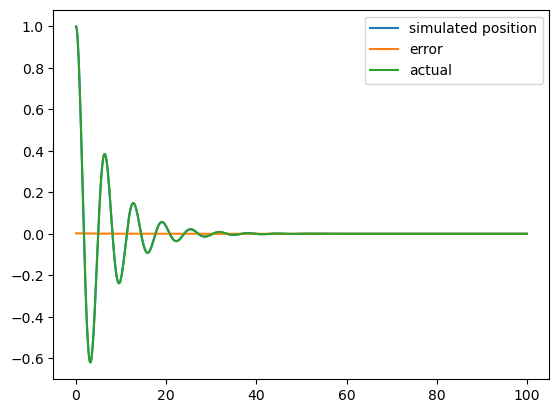

In [102]:
# Plot trajectory
tinterval = np.arange(0, T+dt, dt)
# plt.plot(tinterval, x_l_sim, label="leapfrog")
plt.plot(tinterval, x_er_sim, label="simulated position")
# plt.plot(tinterval, v_er_sim, label="simulated velocity")
plt.plot(tinterval, er_err, label="error")
plt.plot(tinterval, damped_oscillator_trajectory(T, dt, x_0, v_0), label="actual")
plt.legend()
plt.show()

# 1D Trap Simulation

### Equilibrium Starting positions
- 2 Ions: [-1.72273731e-6, 1.72273731e-06]
- 3 Ions: 

In [2]:
# physical constants
Z = 1
e = 1.60217883e-19
eps0 = 8.854187817e-12
M_Yb = 2.8733965e-25
nu = 0.25e6 * 2*np.pi

# dimensionless scale factors
l0 = ((Z*Z * e*e) / (4 * np.pi * eps0 * M_Yb * nu*nu)) ** (1/3)
m0 = M_Yb
t0 = 1 / nu

# error tolerance
hbar = 1.054571817e-34
etol = np.sqrt(hbar / (2 * M_Yb * nu))
print(etol)

1.080849845577369e-08


In [3]:
# Energy/Force calculation methods

# Energy + numerical gradient approach (true MD simulation)
def U(x):
    energy = sum([0.5 * M_Yb * (nu ** 2) * (x[i] ** 2) for i in range(len(x))])
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            energy += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x[i] - x[j]))
    return energy

def neg_grad_U(x, k, b=1, idx=0, dx=1e-8):
    x1 = np.copy(x)
    x1[k] = x[k] - dx
    x2 = np.copy(x)
    x2[k] = x[k] + dx
    return -(U(x2) - U(x1)) / (2*dx)

# Energy + numerical gradient with analytical simplfication approach
def U_k(x, k):
    energy = 0.5 * M * (nu ** 2) * (x[k] ** 2)
    for i in range(len(x)):
        if i != m:
            energy += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x[k] - x[i]))
    return energy

def neg_grad_Um(x, k, dx=1e-8):
    x1 = np.copy(x)
    x1[k] = x[k] - dx
    x2 = np.copy(x)
    x2[k] = x[k] + dx
    return -(U_k(x2, k) - U_k(x1, k)) / (2*dx)

# Analytic force calculation approach
def F_analytic(x, k, v=None, b=0):
    force = -M_Yb * ((nu ** 2) * x[k]) - b*v[k]
    for i in range(k):
        force += ((Z * Z * e * e) / (4*np.pi*eps0)) * ((1 / (x[k] - x[i])) ** 2)
    for i in range(k+1, len(x)):
        force -= ((Z * Z * e * e) / (4*np.pi*eps0)) * ((1 / (x[k] - x[i])) ** 2)
    return force

In [4]:
# optimization
import scipy.optimize as optimize

def pot_energy(x):
    n = x.size
    energy = 0.5*M_Yb*sum((nu**2)*(x*x))
    # energy = 0.5*sum((x*x))
    for i in range(n):
        for j in range(i+1, n):
            energy += ((Z * Z * e * e) / (4 * np.pi * eps0)) * (1 / abs(x[i] - x[j]))
            # energy += (1 / abs(x[i] - x[j]))
    return energy

def jac(x):
    n = x.size
    grad = M_Yb * (nu**2) * np.copy(x)
    # grad = np.copy(x)

    for i in range(n):
        for j in range(i+1, n):
            coulomb = ((Z * Z * e * e) / (4 * np.pi * eps0)) * (1 / ((x[i] - x[j]) ** 2))
            grad[i] += (-1 if x[i] > x[j] else 1) * coulomb
            grad[j] += (1 if x[i] > x[j] else -1) * coulomb
            # grad[i] = grad[i] + (-1 if x[i] > x[j] else 1) * (1 / ((x[i] - x[j]) ** 2))
            # grad[j] = grad[j] + (1 if x[i] > x[j] else -1) * (1 / ((x[i] - x[j]) ** 2))
        
    return grad

x_0 = np.array([-1e-6, 1e-6])

bfgs_tolerance = 1e-34
opt = optimize.minimize(pot_energy, x_0, method="BFGS", jac=jac,
                        options={"gtol": bfgs_tolerance, "disp": False})
r_eq = opt.x
r_eq
    

array([-4.33300669e-06,  4.33300669e-06])

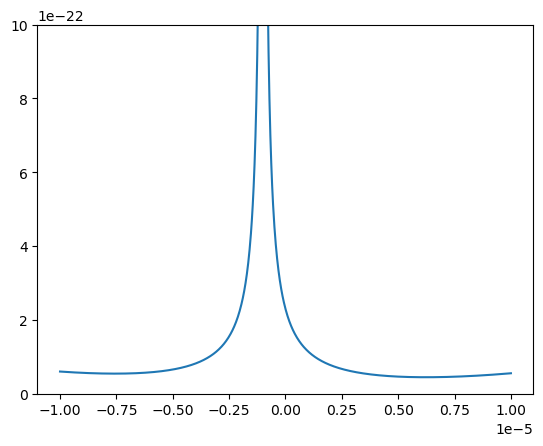

In [5]:
# plot potential energy
ion_pos = [-1e-6]
x_range = np.linspace(-1e-5, 1e-5, 1000)
U_range = 0.5 * M_Yb * (nu ** 2) * (x_range ** 2)
for x_ion in ion_pos:
    U_range += ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / abs(x_range - x_ion))
plt.plot(x_range, U_range)
plt.ylim((0, 1e-21))
plt.show()

In [39]:
# Simulation methods

def sim_euler(x_0, v_0):
    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    x[0] = x_0; v[0] = v_0

    for i in range(n_tsteps):
        for k in range(N):
            F = neg_grad_U(x[i], k)
            a = F / M
            v[i+1,k] = v[i,k] + dt*a
            x[i+1,k] = x[i,k] + dt*v[i,k]

    return x, v

def sim_leapfrog(N, T, dt, M, x_0, v_0):
    n_tsteps = int(T / dt)

    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    vhalf = np.zeros((n_tsteps + 1, N))
    a = np.zeros((n_tsteps + 1, N))

    x[0] = x_0; v[0] = v_0
    for k in range(N):
        a[0,k] = F_analytic(x[0], k, v=v[0], b=0) / M # ion_trap.neg_grad_energy(x[0], k, dx=1e-9) / M

    for i in range(n_tsteps):
        for k in range(N):
            vhalf[i,k] = v[i,k] + 0.5*dt*a[i,k]
            x[i+1,k] = x[i,k] + dt*vhalf[i,k]
        for k in range(N):
            a[i+1,k] = F_analytic(x[i+1], k, v=v[i+1], b=0) / M # ion_trap.neg_grad_energy(x[i+1], k, dx=1e-9) / M
            v[i+1,k] = vhalf[i,k] + 0.5*dt*a[i+1,k]

    return x, v

def sim_er(N, n_tsteps, dt, etol, M, b, x_0, v_0):
    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    a = np.zeros((n_tsteps + 1, N))
    t = np.zeros((n_tsteps + 1))
    err = np.zeros((n_tsteps + 1, N))

    x[0] = x_0 ; v[0] = v_0
    for k in range(N):
        a[0,k] = F_analytic(x[0], k, v=v[0], b=b) / M

    for i in range(n_tsteps):
        xhalf = np.zeros(N)
        vhalf = np.zeros(N)
        for k in range(N):
            xhalf[k] = x[i,k] + v[i,k]*(dt/2)
            vhalf[k] = v[i,k] + a[i,k]*(dt/2)
        for k in range(N):
            ahalf = F_analytic(xhalf, k, v=vhalf, b=b) / M
            x[i+1,k] = x[i,k] + vhalf[k]*dt
            v[i+1,k] = v[i,k] + ahalf*dt
            xerr = np.abs( ( (v[i,k] - vhalf[k])*dt ) / 2) # 1 is the order of magnitude of x
            verr = np.abs( ( (a[i,k] - ahalf)*dt ) / 2) # 1 is the order of magnitude of v
            err[i,k] = xerr # max(xerr, verr)
        for k in range(N):
            a[i+1,k] = F_analytic(x[i+1], k, v=v[i+1], b=b) / M

        t[i+1] = t[i] + dt
        # dt = 0.9 * np.sqrt(etol / np.max(err[i])) * dt
            
    return x, v, a, t, err

In [7]:
# Dimensionless leapfrog simulation
def a_dless(x, k):
    a = -x[k]
    for i in range(k):
        a += 1 / ((x[i] - x[k]) ** 2)
    for i in range(k+1, len(x)):
        a -= 1 / ((x[i] - x[k]) ** 2)
    return a

def sim_leapfrog_dless(N, T, dt, x_0, v_0, input_dless=False, output_dless=False):
    T = T / t0
    dt = dt / t0
    if not input_dless:
        x_0 = np.array(x_0) / l0
        v_0 = np.array(v_0) / (l0 / t0)

    n_tsteps = int(T / dt)
    x = np.zeros((n_tsteps + 1, N))
    v = np.zeros((n_tsteps + 1, N))
    vhalf = np.zeros((n_tsteps + 1, N))
    a = np.zeros((n_tsteps + 1, N))

    x[0] = x_0; v[0] = v_0
    for k in range(N):
        a[0,k] = a_dless(x[0], k)

    for i in range(n_tsteps):
        for k in range(N):
            vhalf[i,k] = v[i,k] + 0.5*dt*a[i,k]
            x[i+1,k] = x[i,k] + dt*vhalf[i,k]
        for k in range(N):
            a[i+1,k] = a_dless(x[i+1], k)
            v[i+1,k] = vhalf[i,k] + 0.5*dt*a[i+1,k]

    if not output_dless:
        x = x * l0
        v = v * (l0 / t0)

    return x, v

In [40]:
import profile, pstats
from pstats import SortKey
from src import ion_trap_1d

# profiling

# pr = profile.Profile()
# p = profile.run("sim_leapfrog(x_0=[-1e-5, -7e-6, -6e-6, -4e-6, -1e-6, 1e-6, 2e-6, 5e-6, 1.4e-5, 2e-5], v_0=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])")
# ps = pstats.Stats(p)
# ps.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats()
# print(ps)

N = 2
T = 3.5e-5
dt = 1e-9

# 9 ions
# x_sim, v_sim = ion_trap_1d.sim_leapfrog(9, T, dt, M, [-0.5339*l, -0.3764*l, -0.2429*l, -0.1194*l, 0*l, 0.1194*l, 0.2429*l, 0.3764*l, 0.5339*l], [0, 0, 0, 0, 0, 0, 0, 0, 0])
# x_sim, v_sim = sim_leapfrog(9, T, dt, M_Yb, [-2.6803*l0*1.004, -1.8897*l0*1.004, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0], [0, 0, 0, 0, 0, 0, 0, 0, 0])

# 5 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(5, T, dt, M, x_0=[-0.6395*l, -0.3017*l, 0, 0.3017*l, 0.6395*l], v_0=[0, 0, 0, 0, 0])

# 4 ions
# x_sim, v_sim = sim_leapfrog(4, T, dt, M, x_0=[(-1.4368 + 0.5)*l, (-0.45438 - 0.5)*l, (0.45438-0.5)*l, (1.4368+0.5)*l], v_0=[0, 0, 0, 0])
# x_sim, v_sim = ion_trap_1d.sim_leapfrog_dless(4, T, dt, x_0=[(-1.4368 + 0.25)*l0, (-0.45438 - 0.25)*l0, (0.45438-0.25)*l0, (1.4368+0.25)*l0], v_0=[0, 0, 0, 0])

# 3 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(3, T, dt, M, x_0=[-1.0772*l + 0.4082*l, 0 - 0.8165*l, 1.0772*l + 0.4082*l], v_0=[0, 0, 0])

# 2 ions
# x_sim, v_sim = ion_trap.sim_leapfrog(2, T, dt, M, [-1e-6, 2e-6], [0, 0])
# x_sim, v_sim = sim_leapfrog(2, T, dt, M_Yb, [-4e-6, 3e-6], [0, 0])
x_sim, v_sim, a_sim, t_sim, err_sim = sim_er(2, 500000, dt, 1e-7, M_Yb, 0, [-4e-6, 4e-6], [0, 0])
# x_sim, v_sim, a_sim, t_sim, err_sim = ion_trap_1d.sim_er(2, 100000, dt, 1e-8, M_Yb, 3e-21, [-4e-6, 4e-6], [0, 0])

# x_sim, v_sim = sim_leapfrog([-1e-6, 3e-6], [0, 0])

x_sim = np.array(x_sim)
v_sim = np.array(v_sim)
a_sim = np.array(a_sim)
t_sim = np.array(t_sim)
err_sim = np.array(err_sim)

In [41]:
# x_sim2, v_sim2, a_sim2, t_sim2, err_sim2 = ion_trap_1d.sim_er(2, 500000, dt, 1e-7, M_Yb, 3e-21, [-4e-6, 4e-6], [0, 0])
x_sim2, v_sim2, a_sim2, t_sim2, err_sim2 = ion_trap_1d.sim_er(2, 500000, dt, 1e-7, M_Yb, 0, [-4e-6, 4e-6], [0, 0])
x_sim2 = np.array(x_sim2)
v_sim2 = np.array(v_sim2)
a_sim2 = np.array(a_sim2)
t_sim2 = np.array(t_sim2)
err_sim2 = np.array(err_sim)

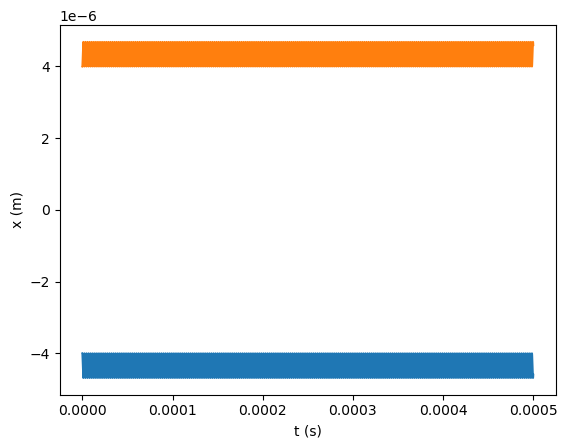

In [42]:
# Plot simulated ion trajectories
for i in range(N):
    # plt.plot(t_sim, err_sim[:,i])
    plt.plot(t_sim, x_sim[:,i])
    # plt.plot(t_sim2, x_sim2[:,i])
    # plt.plot(np.linspace(0,T,int(T / dt)+1), x_sim[:,i])
plt.ylabel("x (m)")
plt.xlabel("t (s)")
# plt.xlim((0, 3e-5))
# plt.ylim((-1e-5, 1e-5))
plt.show()

In [67]:
baseline_energy = ion_trap_1d.total_energy([-2.6803*l0, -1.8897*l0, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0])
print(ion_trap_1d.total_energy([-2.6803*l0*1.004, -1.8897*l0, -1.2195*l0, -0.59958*l0, 0*l0, 0.59958*l0, 1.2195*l0, 1.8897*l0, 2.6803*l0]) - baseline_energy)
print(0.5 * 1.380649e-23 * 0.01)

1.1802833130207861e-26
6.903245e-26


In [31]:
# calculate total energy
total_energy = np.array([(U(x_sim[i]) + sum([0.5 * M_Yb * (v_sim[i][k] ** 2) for k in range(N)])) for i in range(int(T / dt) + 1)])

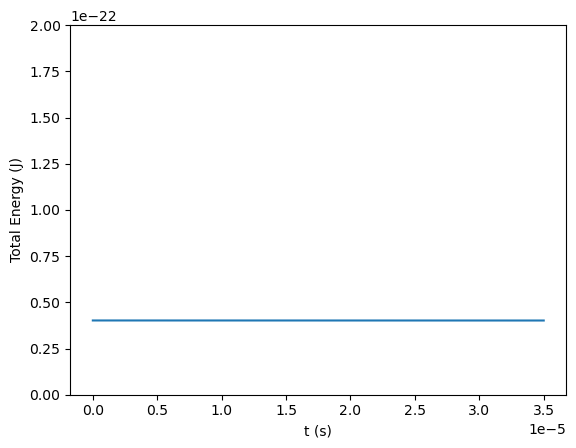

In [32]:
# plot total energy
plt.plot(np.linspace(0, T, int(T / dt)+1), total_energy)
# plt.xlim((0, 5e-6))
plt.ylim((0, 2e-22))
# plt.ylim((0, 1.0750e-19))
plt.xlabel("t (s)")
plt.ylabel("Total Energy (J)")
plt.show()

In [72]:
# change scale to compare with James (1998)
x_sim[-1,:] / l

array([-1.09659839, -0.06125018,  1.15784844])

In [124]:
# animation!
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(-3.5e-6, 3.5e-6), ylim=(-0.003, 0.003))
line, = ax.plot([], [], marker='o', linestyle='')

def init():
    line.set_data(x[0], np.zeros(N))
    return line,

def animate(i):
    line.set_data(x[i], np.zeros(N))
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=K, interval=2, blit=True)
plt.show()

NameError: name 'K' is not defined

In [62]:
# plot single ion trajectory
plt.plot(np.linspace(0,T,n_tsteps+1), x_sim[:,0])
plt.xlim((0, 1e-5))
plt.show()

NameError: name 'n_tsteps' is not defined

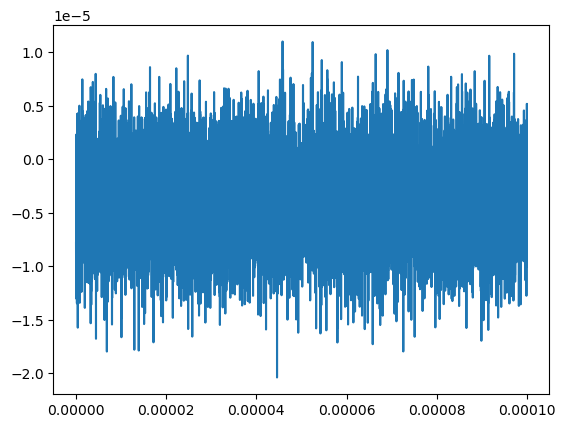

In [403]:
# add noise
x_noise = x_sim[:,0] + np.random.normal(0, 4e-6, size=(n_tsteps+1))
plt.plot(np.linspace(0,T,n_tsteps+1), x_noise)
plt.show()

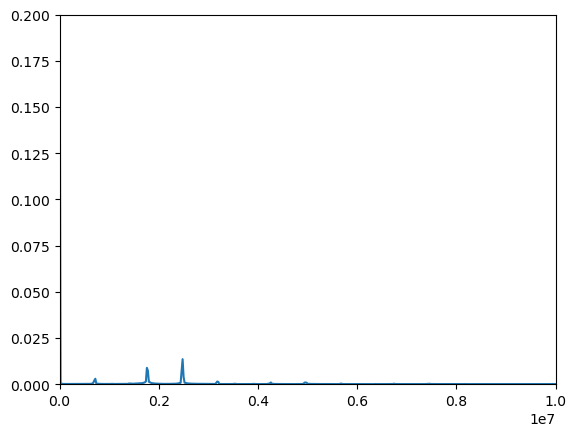

In [14]:
# Original Fourier Transform
from scipy.fft import rfft, rfftfreq, rfftn

# yf = np.abs(rfftn(x_sim[:,0]))
# xf = rfftfreq(int(T / dt), T/int(T/dt))
yf = np.abs(rfftn(x_sim[:50000,0]))
xf = rfftfreq(50000, T/int(T/dt))

plt.plot(xf, yf)
plt.xlim((0, 1e7))
plt.ylim((0, 0.2))
plt.show()

In [42]:
# extract frequencies and check eigenvalues
pairs = [(yf[i], xf[i]) for i in range(len(yf))]
pairs = sorted(pairs)
for p in pairs[-N-1:]:
    print(f"{p[1]} {((2*np.pi*p[1]) / nu) ** 2}")

1720000.0 2.9583999999999997
1760000.0 3.0976
1740000.0 3.0276
0.0 0.0


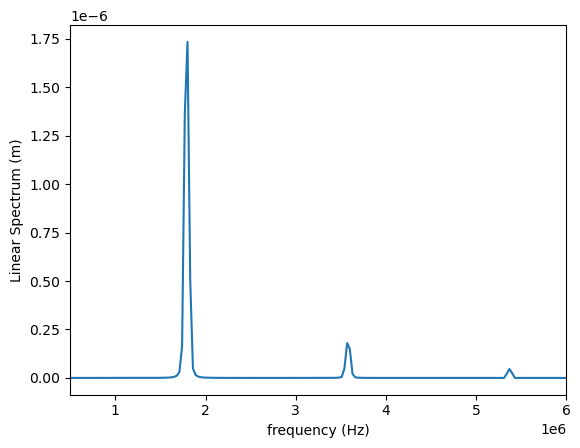

In [33]:
# FFT with windowing
from scipy.signal import welch, butter, sosfilt

# sos = butter(1e2, 1e5, fs=(1/dt), btype="highpass", output="sos")
# x_filt = sosfilt(sos, x_sim[:,0])
# plt.plot(np.linspace(0,T,n_tsteps+1), x_filt)

freq, Pxx_spec = welch(x_sim[:,0], fs=(1/dt), window="hann", scaling="spectrum", nperseg=(n_tsteps // 3))
lin_spec = Pxx_spec ** 0.5
plt.plot(freq, lin_spec)
plt.xlim((5e5, 6e6))
plt.xlabel("frequency (Hz)")
plt.ylabel("Linear Spectrum (m)")
plt.show()

# 3D Trap Simulation

In [2]:
# physical constants
Z = 1
e = 1.60217883e-19
eps0 = 8.854187817e-12
M_Yb = 2.8733965e-25
hbar = 1.05457182e-34

# laser cooling
laser_wavelength = 369 * 1e-9
k = (2*np.pi) / laser_wavelength
laser_origin = np.array([0, 0, 1e-6])
kvector = k * 1/np.sqrt(3) * np.array([1, 1, 1])
laser_width = 2e-7

# ion_freq = 19.6 * 1e6
# rabi_freq = 60 * 2*np.pi*1e6
decay_rate = 19.6 * 1e6 * 2*np.pi
detuning =  -decay_rate / 2
max_s = 1   # 2*(rabi_freq ** 2) / (decay_rate ** 2)
# For a given laser focus, choose I0 so that the saturation parameter has a maximum value of 1
# gamma0 / 2pi = 19.6 MHz

F0 = (hbar * decay_rate * (max_s/2) / (1 + max_s + (2*detuning/decay_rate) ** 2)) * kvector
print(f"F0: {F0}")
kappa = (8*k*detuning/(decay_rate ** 2)) / (1 + max_s + (2*detuning/decay_rate) ** 2)
print(f"kappa: {kappa}")

# trap parameters
wx = 5.7 * 2*np.pi*1e6
wy = 5.7 * 2*np.pi*1e6
wz = 1.5 * 2*np.pi*1e6
# wz = 0.65 * 2*np.pi*1e6
# wz = 0.6487 * 2*np.pi*1e6
# wz = .600 * 2*np.pi*1e6


# dimensionless scale factors
# l0 = ((Z*Z * e*e) / (4 * np.pi * eps0 * M_Yb * nu*nu)) ** (1/3)
# m0 = M_Yb
# t0 = 1 / nu

F0: [2.12791231e-20 2.12791231e-20 2.12791231e-20]
kappa: -0.18435558505244917


In [3]:
# calculate total potential energy

def pot_energy(r):
    n = r.size // 3
    energy = 0

    # harmonic potential
    for i in range(n):
        energy += 0.5 * M_Yb * ((wx**2)*(r[3*i]**2) + (wy**2)*(r[3*i+1]**2) + (wz**2)*(r[3*i+2]**2))

    # couloumb potential
    for i in range(n):
        for j in range(i+1,n):
            dist = np.sqrt((r[3*i] - r[3*j])**2 + (r[3*i+1] - r[3*j+1])**2 + (r[3*i+2] - r[3*j+2])**2)
            energy += ((Z * Z * e * e) / (4 * np.pi * eps0)) * (1 / dist)

    return energy

# calculate gradient of potential energy
def jac(r):
    n = r.size // 3
    grad = np.zeros(n*3)

    for i in range(n):
        grad[3*i] = M_Yb * (wx**2) * r[3*i]
        grad[3*i+1] = M_Yb * (wy**2) * r[3*i+1]
        grad[3*i+2] = M_Yb * (wz**2) * r[3*i+2]

    for i in range(n):
        for j in range(i+1, n):
            dist = np.sqrt((r[3*i] - r[3*j])**2 + (r[3*i+1] - r[3*j+1])**2 + (r[3*i+2] - r[3*j+2])**2)
            coulomb = ((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / (dist ** 2))

            fx = coulomb * ((r[3*i] - r[3*j]) / dist)
            grad[3*i] -= fx; grad[3*j] += fx

            fy = coulomb * ((r[3*i+1] - r[3*j+1]) / dist)
            grad[3*i+1] -= fy; grad[3*j+1] += fy
            
            fz = coulomb * ((r[3*i+2] - r[3*j+2]) / dist)
            grad[3*i+2] -= fz; grad[3*j+2] += fz
    
    return grad

# distance from laser beam
def dist_to_laser(r):
    return np.linalg.norm(np.cross(r-laser_origin, kvector)) / np.linalg.norm(kvector)

# calculate accleration
def acceleration(r, v, k, laser_type="none"):
    # trap forces
    a = np.array([-(wx**2)*r[k][0], -(wy**2)*r[k][1], -(wz**2)*r[k][2]])

    # laser cooling forces
    if laser_type == "uniform":
        rho_ee = (max_s/2) / (1 + max_s + (( (2*(detuning - kvector*v[k])) / decay_rate ) ** 2))
        a += kvector * (hbar * decay_rate * rho_ee) / M_Yb
        # a += (F0*(1 + ((kappa/k)*kvector)*v[k])) / M_Yb
    elif laser_type == "gaussian":
        sat_param = max_s * np.exp( -2 * (dist_to_laser(r[k]) ** 2) / (laser_width ** 2) )
        scattering_rate = (decay_rate * sat_param) / (1 + 2*sat_param + (( (2*(detuning - np.dot(kvector, v[k])) / decay_rate )) ** 2))
        a += kvector * (hbar * scattering_rate) / M_Yb

    # coulomb forces
    for i in range(len(r)):
        if k != i:
            coulomb_a = (((Z * Z * e * e) / (4*np.pi*eps0)) * (1 / (np.linalg.norm(r[k]-r[i]) ** 2))) / M_Yb
            dr = (r[k]-r[i]) / np.linalg.norm(r[k]-r[i])
            a += coulomb_a * dr
    return a

In [4]:
# leapfrog simulation
def sim_leapfrog(n, T, dt, r_0, v_0):
    n_tsteps = int(T / dt)
    r = np.zeros((n_tsteps+1, n, 3))
    v = np.zeros((n_tsteps+1, n, 3))
    vhalf = np.zeros((n_tsteps+1, n, 3))
    a = np.zeros((n_tsteps+1, n, 3))

    r[0] = r_0; v[0] = v_0
    for k in range(n):
        a[0,k] = acceleration(r[0], v[0], k)

    for i in range(n_tsteps):
        for k in range(n):
            vhalf[i,k] = v[i,k] + 0.5*dt*a[i,k]
            r[i+1,k] = r[i,k] + dt*vhalf[i,k]
        for k in range(n):
            a[i+1,k] = acceleration(r[i+1], v[i+1], k, laser_cooling=True)
            v[i+1,k] = vhalf[i,k] + 0.5*dt*a[i,k]
    
    return r, v, a

# euler-richardson simulation
def sim_er(n, n_tsteps, dt, etol, r_0, v_0):
    r = np.zeros((n_tsteps+1, n, 3))
    v = np.zeros((n_tsteps+1, n, 3))
    a = np.zeros((n_tsteps+1, n, 3))
    t = np.zeros((n_tsteps+1))
    err = np.zeros((n_tsteps+1, n, 3))

    r[0] = r_0; v[0] = v_0
    for k in range(n):
        a[0,k] = acceleration(r[0], v[0], k, laser_type="gaussian")

    for i in range(n_tsteps):
        rhalf = np.zeros((n, 3))
        vhalf = np.zeros((n, 3))
        for k in range(n):
            rhalf[k] = r[i,k] + v[i,k]*(dt/2)
            vhalf[k] = v[i,k] + a[i,k]*(dt/2)
        for k in range(n):  
            ahalf = acceleration(rhalf, vhalf, k, laser_type="gaussian")
            r[i+1,k] = r[i,k] + vhalf[k]*dt
            v[i+1,k] = v[i,k] + ahalf*dt
            rerr = np.abs( ( (v[i,k] - vhalf[k])*dt ) / 2) # 1 is the order of magnitude of r
            verr = np.abs( ( (a[i,k] - ahalf)*dt ) / 2)
            err[i,k] = max(max(rerr), max(verr))
        for k in range(n):
            a[i+1,k] = acceleration(r[i+1], v[i+1], k, laser_type="gaussian")

        t[i+1] = t[i] + dt
        # dt = 0.9 * np.sqrt(etol / np.max(err[i])) * dt

    return r, v, a, t, err

In [5]:
# find equilibrium positions
import scipy.optimize as optimize
    
def find_equilibrium_positions(n):
    r_0 = np.zeros(3*n)
    for i in range(n):
        r_0[3*i] = (-1) ** (i % 2) * 1e-6
        r_0[3*i+1] = (-1) ** (i % 2) * 1e-6
        r_0[3*i+2] = (i - (n // 2)) * 1e-6
    
    bfgs_tolerance = 1e-34
    opt = optimize.minimize(pot_energy, r_0, method="BFGS", jac=jac,
                            options={"gtol": bfgs_tolerance, "disp": False})
    
    return opt.x

r_eq = find_equilibrium_positions(3)
np.where(np.abs(r_eq) > 1e-9, r_eq, 0).reshape((3, 3))

array([[ 0.00000000e+00,  0.00000000e+00, -2.24394315e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.24394326e-06]])

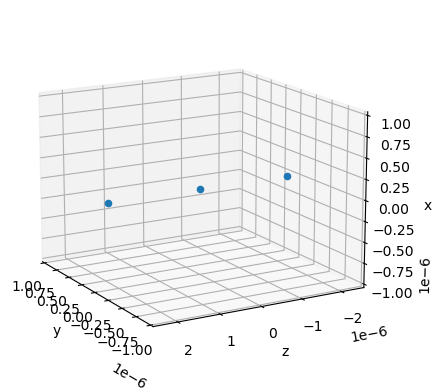

In [6]:
# plot equilibrium positions to see strucutral phase transitions
fig = plt.figure()
ax = plt.axes(projection="3d")

r_eq_plot = r_eq.reshape((3, 3))

ax.scatter(r_eq_plot[:,0], r_eq_plot[:,1], r_eq_plot[:,2], depthshade=False)
ax.axes.set_xlabel("x")
ax.axes.set_ylabel("y")
ax.axes.set_zlabel("z")
ax.axes.set_xlim3d(left=-1e-6, right=1e-6)
ax.axes.set_ylim3d(bottom=-1e-6, top=1e-6)
# ax.axes.set_zlim3d(bottom=-1.5e-5, top=1.5e-5)""
ax.view_init(elev=15, azim=150, vertical_axis='x')

plt.show()

In [7]:
# start energy at the approrpriate temperature scale

# (for loading ions in trap) start with 1/10 room temperature distribution of energies 
# (once ions are trapped) start with 1/1000 hbar*omega temperature (100 nbar)
# (temperature at which crystal becomes fluid) 

r_0 = np.copy(r_eq) * np.random.normal(loc=1, scale=0.05, size=r_eq.size)

baseline_energy = pot_energy(r_eq)
print(f"Baseline Energy: {baseline_energy}")
print(f"Potential Energy: {pot_energy(r_0)}")
print(f"Energy Difference: {baseline_energy - pot_energy(r_0)}")
print(f"1.5•k_b•T: {1.5 * 1.380649e-23 * 0.01}") # 3/2 * k_b * T

Baseline Energy: 3.855518491932189e-22
Potential Energy: 3.857599856063185e-22
Energy Difference: -2.0813641309960555e-25
1.5•k_b•T: 2.0709735e-25


In [8]:
# simulation
from src import ion_trap_3d

n = 3
T = 2e-4
dt = 1e-9

r_0 = np.array([[0, 0, 2.6e-6],
                [0, 0, 0.4e-6],
                [0, 0, -2.1e-6]])

# cython
r_0 = r_0.reshape(n*3)
v_0 = np.zeros(n*3)
# r_sim, v_sim = ion_trap_3d.sim_leapfrog(n, T, dt, r_0, v_0)
r_sim, v_sim, a_sim, t_sim, err_sim = ion_trap_3d.sim_er(n, 1000000, dt, 1e-7, r_0, v_0)

#python
# r_0 = r_0.reshape((n, 3))
# v_0 = np.zeros((n, 3))
# r_sim, v_sim, a_sim, t_sim, err_sim = sim_er(n, 200000, dt, 1e-7, r_0, v_0)
# # r_sim, v_sim, a_sim = sim_leapfrog(n, T, dt, r_0, v_0)

r_sim = np.array(r_sim).reshape((-1, n, 3))
v_sim = np.array(v_sim).reshape(-1, n, 3)
a_sim = np.array(a_sim).reshape((-1, n, 3))
t_sim = np.array(t_sim).reshape((-1, n, 3))[:,0,0]
err_sim = np.array(err_sim).reshape((-1, n, 3))

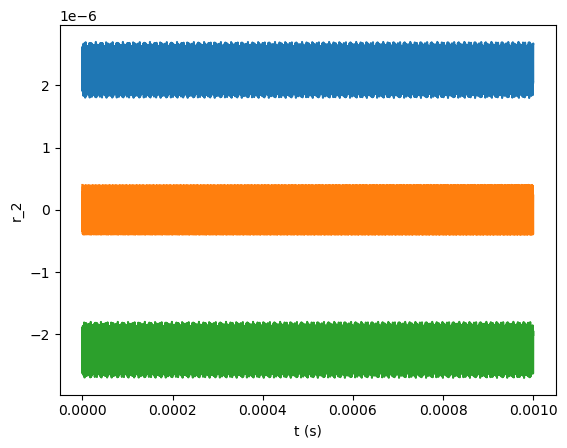

In [12]:
# Plot simulated ion trajectories
dim = 2
for k in range(n):
    # plt.plot(np.linspace(0, T, int(T / dt)+1), r_sim[:,k,dim])
    plt.plot(t_sim, r_sim[:,k,dim])
    # plt.plot(t_sim, err_sim[:,k,dim])
# plt.plot(np.linspace(0,T,int(T / dt)+1), r_sim[:,0,2])
plt.ylabel(f"r_{dim}")
plt.xlabel("t (s)")
# plt.xlim(0, 1e-9)
# plt.ylim(0, 2e-7)
plt.show()

In [42]:
# calculate total energy at each step of simulation
def calc_tot_energy(r, v):
    return pot_energy(r.flatten()) + 0.5 * M_Yb * np.sum(v * v)

total_energy = np.array([calc_tot_energy(r_sim[i], v_sim[i]) for i in range(len(t_sim))])

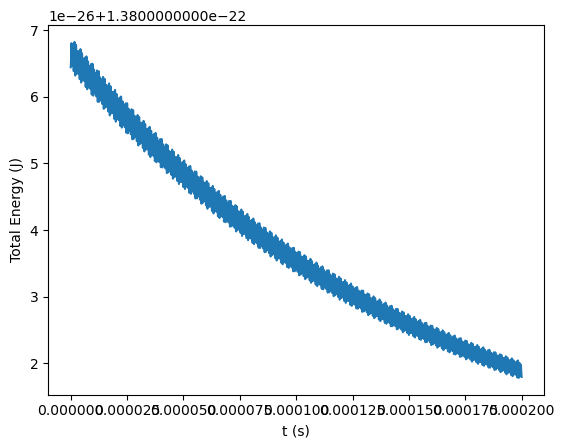

In [38]:
plt.plot(t_sim, total_energy)
plt.xlabel("t (s)")
plt.ylabel("Total Energy (J)")
plt.show()

In [39]:
np.savetxt("energy.csv", total_energy, delimiter=",")

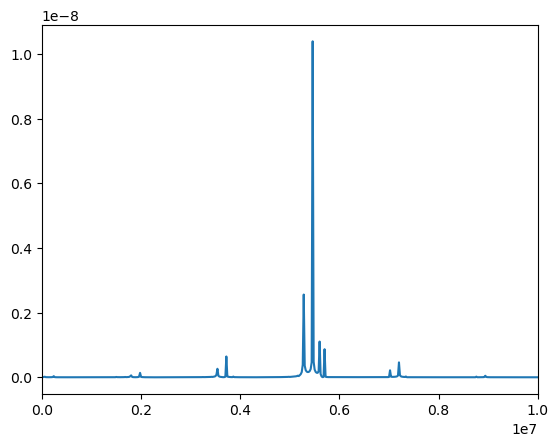

In [14]:
# Fourier Transform
from scipy.fft import rfft, rfftfreq, rfftn

yf = np.abs(rfftn(r_sim[:,1,1]))
xf = rfftfreq(int(T / dt), T/int(T/dt))

plt.plot(xf, yf)
plt.xlim((1e-9, 1e7))
# plt.ylim((0, 0.0012))
plt.show()

# Ring Trap

In [ ]:
# trap radius - 100 microns
# 10-20 ions
